<a href="https://colab.research.google.com/github/NicoFuentese/Ciencia_De_Datos_TD2025/blob/main/5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from math import sqrt
import statistics as stats
from scipy import stats

In [ ]:
grupo_A = [85, 90, 78, 88, 92, 80, 86, 89, 84, 87, 91, 82, 83, 85, 88]
grupo_B = [70, 72, 75, 78, 80, 68, 74, 76, 79, 77, 73, 71, 75, 78, 80]

In [ ]:
#1

"""
Población, muestra y criterios.
Población: estudiantes del curso.
Muestra: estudiantes inscritos este semestre que acepten participar.
Inclusión: estar matriculado y asistir al menos al 80% de clases regulares.
Exclusión: ausentismo severo, necesidades especiales que requieran apoyos distintos a la tutoría estándar (para no mezclar intervenciones).

Diseño:
Ensayo controlado aleatorizado pretest–posttest con dos grupos paralelos:

Grupo Tutoría: recibe sesiones semanales estandarizadas (duración, contenidos y tutores fijos).

Grupo Control: no recibe tutoría (clases regulares) o recibe material pasivo equivalente (por ejemplo, guías sin sesiones).

Aleatorización y balance.
Aleatorización 1:1, estratificada por variables pronóstico (p. ej., puntaje diagnóstico inicial/pretest, sección/horario, género o nivel previo) para balancear covariables. Dentro de cada estrato, usar bloques de tamaño variable para evitar sesgos de asignación.

Estandarización de la intervención.
Guía única de contenidos, minuta por sesión, duración fija (p.ej., 60–90 min/semana por 6–8 semanas), ratio tutor:estudiantes constante, checklists de cumplimiento. Capacitar a tutores y registrar asistencia y cobertura de contenidos.

Mediciones y variables.
Resultado primario: puntaje en evaluación final (o postest equivalente).
Covariables: pretest (diagnóstico), asistencia, horas de estudio autodeclaradas, promedio previo, uso de recursos externos.
Resultados secundarios: tasa de aprobación, satisfacción, retención de contenidos en un quiz corto.

Plan de análisis (pre-especificado).

1. Análisis principal: comparar ganancia (post − pre) entre grupos o aplicar ANCOVA del postest ajustando por pretest (mayor potencia).

2. Si no hay pretest: comparar medias con t de Student (Welch si varianzas desiguales), prueba unilateral según H1.

3. Reportar IC95% de la diferencia y tamaño de efecto (Cohen’s d / Hedges’ g).

4. Verificaciones: normalidad de residuales, homogeneidad de varianzas (Levene), influencia de atípicos (diagnósticos).

5. Sensibilidad: análisis por protocolo vs. intención de tratar; imputación simple para pocos faltantes o MICE si faltan no son al azar.

Hipotesis:
H0 = no hay diferencia entre grupos. (ututoria - ycontrol =  0)
H1 = la tutoría aumenta el puntaje. (ututoria - ycontrol > 0)

Criterio de exito:
Evidencia estadística (p < 0,05 unil.) y un IC95% cuya cota inferior sea > 0 en la métrica de ganancia/postest.
"""

In [ ]:
#2

def describe (lista):
  return {
      "n": len(lista),
      "min": min(lista),
      "max": max(lista),
      "promedio": stats.mean(lista),
      "mediana": stats.median(lista),
      "moda": stats.mode(lista),
      "varianza": stats.variance(lista)
  }

desc_A = describe(grupo_A)
desc_B = describe(grupo_B)

resumen = pd.DataFrame.from_dict({
    "A(tutoria)" : desc_A,
    "B(control)" : desc_B
}, orient = "index")

print(resumen)

             n  min  max   promedio  mediana  moda   varianza
A(tutoria)  15   78   92  85.866667       86    85  16.123810
B(control)  15   68   80  75.066667       75    75  13.780952


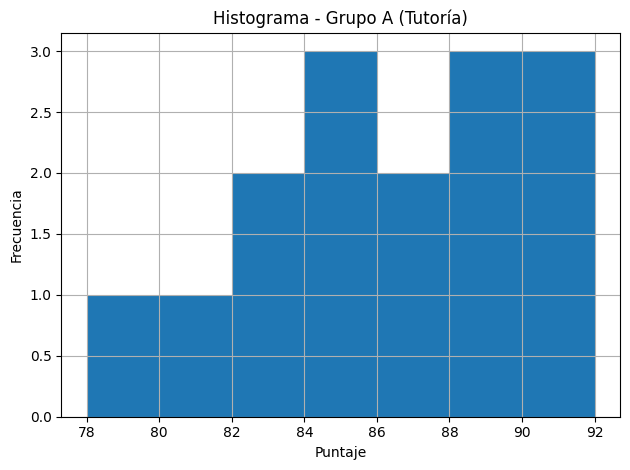

In [ ]:
#histograma grupo A
plt.figure()
plt.hist(grupo_A, bins=7)
plt.title("Histograma - Grupo A (Tutoría)")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.grid()
plt.show()

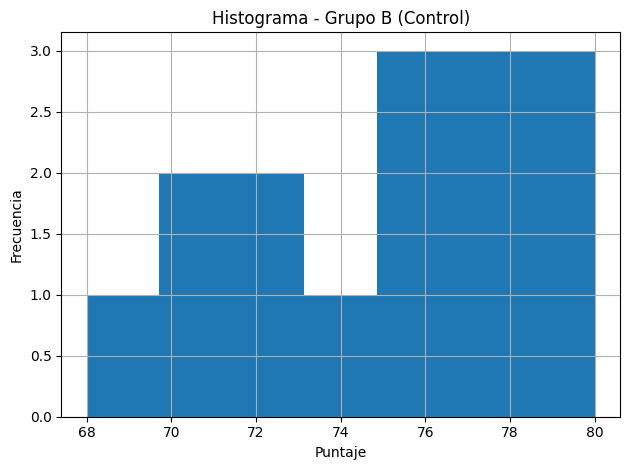

In [ ]:
plt.figure()
plt.hist(grupo_B, bins=7)
plt.title("Histograma - Grupo B (Control)")
plt.xlabel("Puntaje")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.grid()
plt.show()

/tmp/ipython-input-1437025256.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([grupo_A, grupo_B], labels=["A (Tutoría)", "B (Control)"])


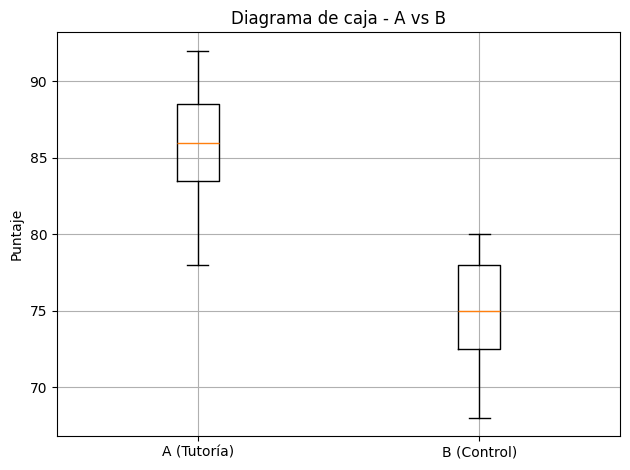

In [ ]:
plt.figure()
plt.boxplot([grupo_A, grupo_B], labels=["A (Tutoría)", "B (Control)"])
plt.title("Diagrama de caja - A vs B")
plt.ylabel("Puntaje")
plt.tight_layout()
plt.grid()
plt.show()

In [ ]:
#3
alpha = 0.05

# Hipotesis:
# H0: mu_A - mu_B = 0
# H1: mu_A - mu_B > 0  (prueba unilateral, cola derecha)

A = np.array(grupo_A, dtype=float)
B = np.array(grupo_B, dtype=float)

nA, nB = len(A), len(B)
mA, mB = A.mean(), B.mean()
sA, sB = A.std(ddof=1), B.std(ddof=1)

se2 = (sA**2)/nA + (sB**2)/nB
t_stat = (mA - mB) / np.sqrt(se2)

#grados de libertad
df = (se2**2) / ( (sA**4)/(nA**2*(nA-1)) + (sB**4)/(nB**2*(nB-1)) )

p_valor = 1 - stats.t.cdf(t_stat, df)

# Resultados
print(f"Media A = {mA:.3f}, SD A = {sA:.3f}, nA = {nA}")
print(f"Media B = {mB:.3f}, SD B = {sB:.3f}, nB = {nB}")
print(f"Diferencia (A - B) = {mA - mB:.3f}")
print(f"Estadistico t = {t_stat:.4f}")
print(f"gl (Welch) ≈ {df:.2f}")
print(f"Valor-p (una cola) = {p_valor:.8f}")

# Decisión
if p_valor < alpha:
    print("Decision: Se rechaza H0. Evidencia de que u_A > u_B.")
else:
    print("Decision: No se rechaza H0.")

Media A = 85.867, SD A = 4.015, nA = 15
Media B = 75.067, SD B = 3.712, nB = 15
Diferencia (A - B) = 10.800
Estadístico t = 7.6489
gl (Welch) ≈ 27.83
Valor-p (una cola) = 0.00000001
Decisión: Se rechaza H0. Evidencia de que u_A > u_B.


In [ ]:
#4
diff = mA - mB
se = np.sqrt(se2)
tcrit = stats.t.ppf(1 - alpha/2, df)

ci_low  = diff - tcrit*se
ci_high = diff + tcrit*se

# Resultados
print(f"Media A={mA:.3f}, SD A={sA:.3f}, nA={nA}")
print(f"Media B={mB:.3f}, SD B={sB:.3f}, nB={nB}")
print(f"Diferencia (A - B) = {diff:.3f}")
print(f"gl (Welch) ≈ {df:.2f}, t* = {tcrit:.4f}")
print(f"IC 95% (mu_A - mu_B): [{ci_low:.3f}, {ci_high:.3f}]")

# Interpretación rápida
if ci_low > 0:
    print("Interpretacion: como todo el IC está por sobre 0, la tutoría aumenta el puntaje promedio.")
else:
    print("Interpretacion: el IC incluye 0; no hay evidencia concluyente de aumento.")

Media A=85.867, SD A=4.015, nA=15
Media B=75.067, SD B=3.712, nB=15
Diferencia (A - B) = 10.800
gl (Welch) ≈ 27.83, t* = 2.0490
IC 95% (mu_A - mu_B): [7.907, 13.693]
Interpretación: como todo el IC está por sobre 0, la tutoría aumenta el puntaje promedio.
